<h1 style="text-align:center">Covid-19 Tweet Analysis</h1>

<div style="text-align:center;"><img src="https://images.unsplash.com/photo-1592499879835-3a1691ab26be?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1650&q=80" /></div>

**Context:** 
> Perform Text Classification on the data. The tweets have been pulled from Twitter and manual tagging has been done then.
The names and usernames have been given codes to avoid any privacy concerns.

**About the Data:**

1) Location   
2) Tweet At   
3) Original Tweet   
4) Label


# Imports

In [1]:
# Data Processing
import numpy as np 
import pandas as pd 
import re

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

import missingno as msno


import seaborn as sns
sns.set(style='whitegrid')

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Exploratory Data Analysis

In [2]:
train = pd.read_csv("input/Corona_NLP_train.csv", encoding='latin-1')
test = pd.read_csv("input/Corona_NLP_test.csv")

In [3]:
train

UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
3          3802       48754                           NaN  16-03-2020   
4          3803       48755                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  
0      @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1      advice Talk to your neighbours family to excha...            Positive  
2      Coronavirus Australia: Woolworths to give elde...            Positive  
3      My food stock is not the only one which is emp...            Positive  
4      Me, ready to go at supermarket during the #COV...  Extremely Negative  
...                                                  ...                 ...  
41152  Airline pilots offering to stock supermarket s...             Neutral  
41153  Response to complaint not provided citing COVI...  Extremely Negative  
41154  You know itÂs getting tough when @KameronWild...            Positive  
41155  Is it wrong that the smell of hand sanitizer i...             Neutral  
41156  @TartiiCat Well new/used Rift S are going for ...            Negative  

[41157 rows x 6 columns]

## Target Value - Sentiment

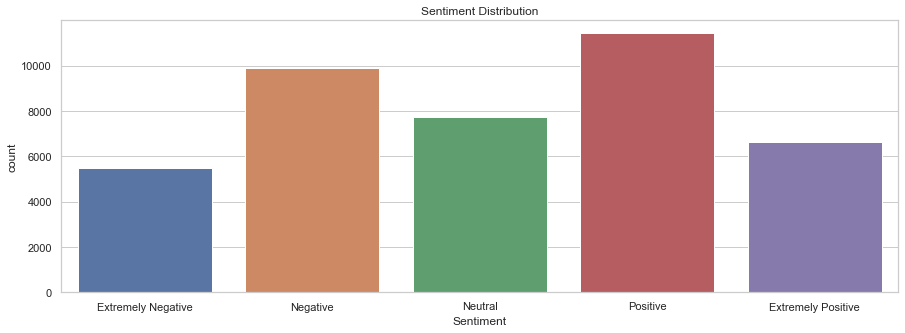

In [4]:
plt.figure(figsize=(15,5))
b = sns.countplot(x='Sentiment', data=train, order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'])
b.set_title("Sentiment Distribution");

We can see that most posts have a positive sentiment and the least posts have an extremely negative sentiment. 

## Missing Values

In [5]:
train.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

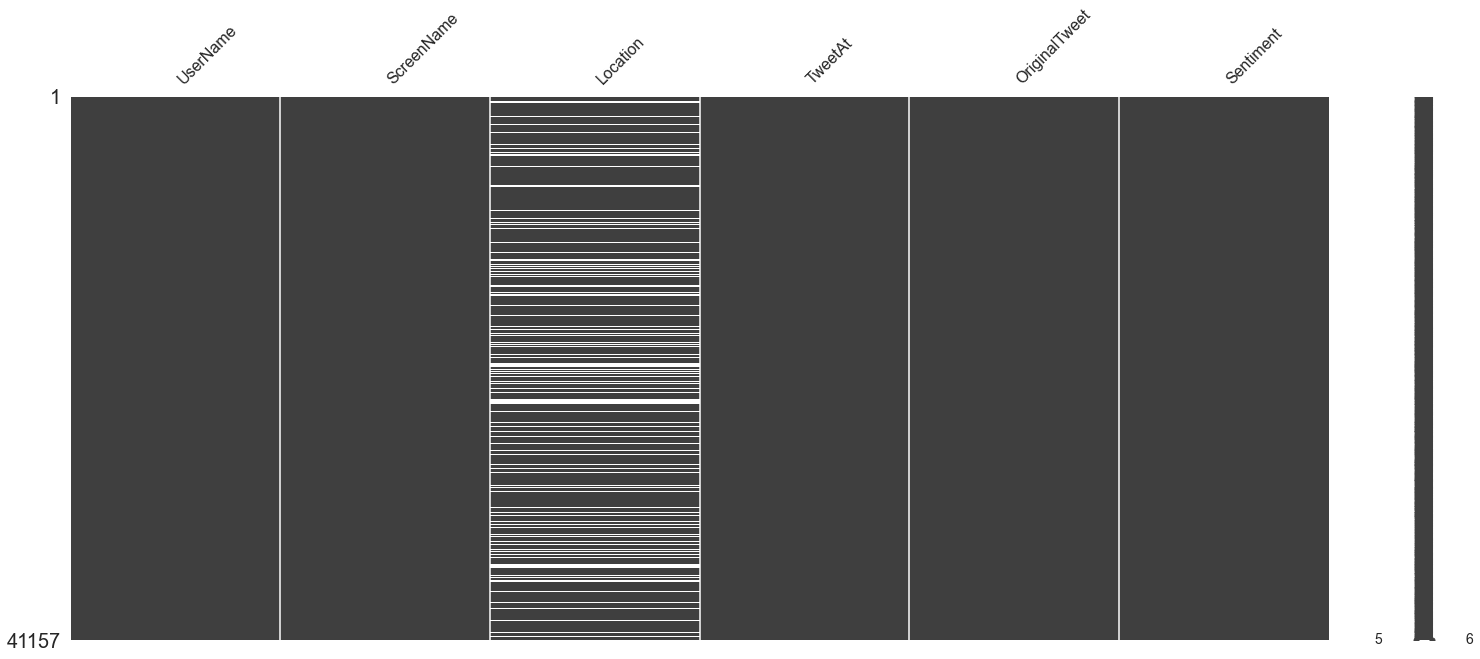

In [6]:
msno.matrix(train);

We only have missing values for `Location`.

## User Name

In [7]:
train['UserName'].nunique()

41157

We have as many unique Users as we have tweets.

# ScreenName

In [8]:
train['ScreenName'].nunique()

41157

We again have the same amount of unique ScreenNames as we have tweets.

In [9]:
train.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

## OriginalTweet

### Preprocessing

In [10]:
# Remove URLs

def remove_urls(text):
    return re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)
train['Content']=train['OriginalTweet'].apply(lambda x:remove_urls(x))

In [11]:
# Remove HTML

def remove_urls(text):
    return re.sub(r'<.*?>', '', text)
train['Content']=train['Content'].apply(lambda x:remove_urls(x))

### Word Cloud

**Which words appear the most in tweets?**

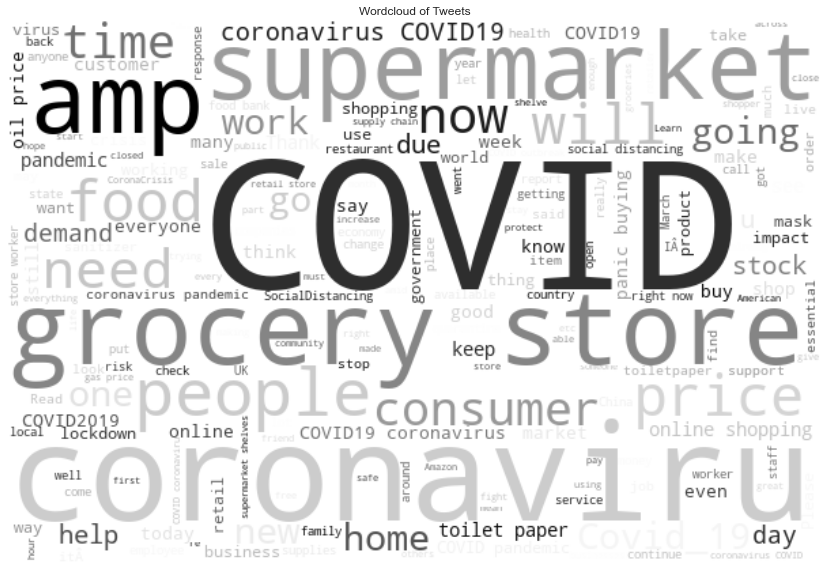

In [12]:
fig, (ax) = plt.subplots(1,1,figsize=[15, 10])
wc = WordCloud(width=600,height=400, background_color='white', colormap="Greys").generate(" ".join(train['Content']))

ax.imshow(wc,interpolation='bilinear')
ax.axis('off')
ax.set_title('Wordcloud of Tweets');

**Which words appear the most in tweets with an extremely positive sentiment?**

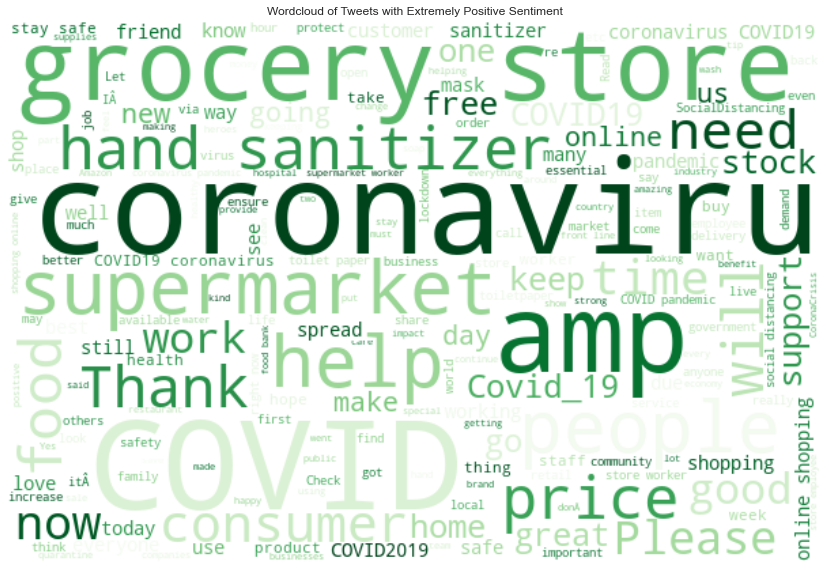

In [13]:
fig, (ax) = plt.subplots(1,1,figsize=[15, 10])
wc = WordCloud(width=600,height=400, background_color='white', colormap="Greens").generate(" ".join(train['Content'][train['Sentiment'] == 'Extremely Positive']))

ax.imshow(wc,interpolation='bilinear')
ax.axis('off')
ax.set_title('Wordcloud of Tweets with Extremely Positive Sentiment');

**Which words appear the most in tweets with an positive sentiment?**

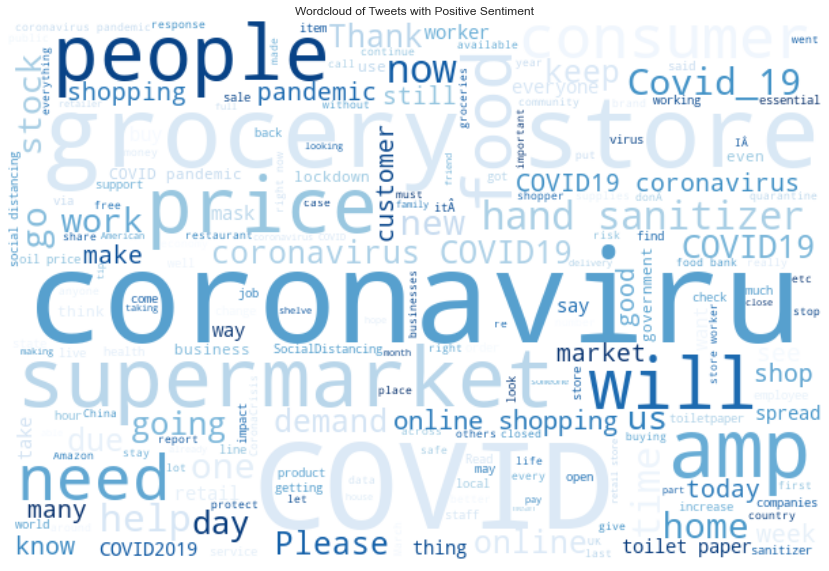

In [14]:
fig, (ax) = plt.subplots(1,1,figsize=[15, 10])
wc = WordCloud(width=600,height=400, background_color='white', colormap="Blues").generate(" ".join(train['Content'][train['Sentiment'] == 'Positive']))

ax.imshow(wc,interpolation='bilinear')
ax.axis('off')
ax.set_title('Wordcloud of Tweets with Positive Sentiment');

**Which words appear the most in tweets with an neutral sentiment?**

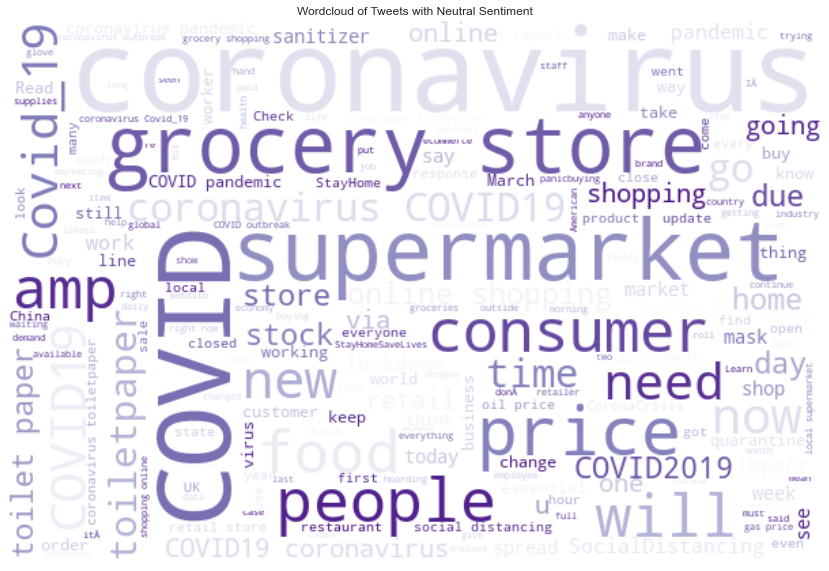

In [15]:
fig, (ax) = plt.subplots(1,1,figsize=[15, 10])
wc = WordCloud(width=600,height=400, background_color='white', colormap="Purples").generate(" ".join(train['Content'][train['Sentiment'] == 'Neutral']))

ax.imshow(wc,interpolation='bilinear')
ax.axis('off')
ax.set_title('Wordcloud of Tweets with Neutral Sentiment');

**Which words appear the most in tweets with an negative sentiment?**

In [16]:
fig, (ax) = plt.subplots(1,1,figsize=[15, 10])
wc = WordCloud(width=600,height=400, background_color='white', colormap="Oranges").generate(" ".join(train['Content'][train['Sentiment'] == 'Negative']))

ax.imshow(wc,interpolation='bilinear')
ax.axis('off')
ax.set_title('Wordcloud of Tweets with Negative Sentiment');

**Which words appear the most in tweets with an extremely negative sentiment?**

In [17]:
fig, (ax) = plt.subplots(1,1,figsize=[15, 10])
wc = WordCloud(width=600,height=400, background_color='white', colormap="Reds").generate(" ".join(train['Content'][train['Sentiment'] == 'Extremely Negative']))

ax.imshow(wc,interpolation='bilinear')
ax.axis('off')
ax.set_title('Wordcloud of Tweets with Extremely Negative Sentiment');

### Tweet Length

In [18]:
# Get Tweet length

def tweet_length(text):
    return len(text)
train['TweetLength']=train['Content'].apply(lambda x:tweet_length(x))

In [19]:
b = sns.boxplot(y = 'TweetLength', data = train)
b.set_title("TweetLength Distribution");

In [20]:
b = sns.boxplot(y = train['TweetLength'][train['Sentiment'] == 'Extremely Positive'], data = train)
b.set_title("TweetLength Distribution for Extremely Positive Sentiment");

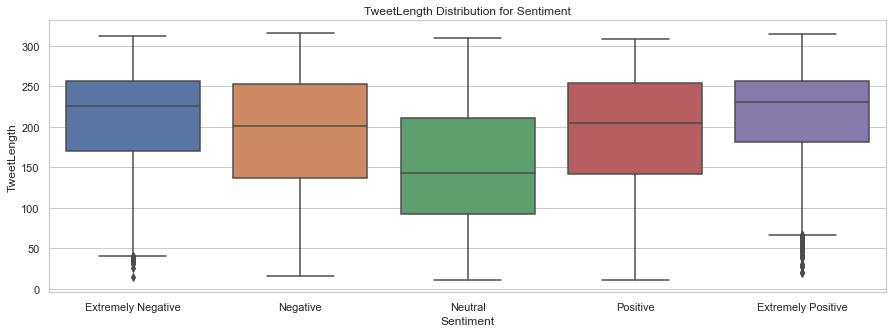

In [21]:
plt.figure(figsize=(15,5))
b = sns.boxplot(y='TweetLength', x='Sentiment', data=train, order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']);
b.set_title("TweetLength Distribution for Sentiment");

## Location

In [22]:
train['Country'] = train['Location'].str.split(',').str[-1]

# **To be continued...**